# 02. 1차원 데이터의 정리

## 데이터 중심의 지표

In [4]:
import numpy as np
import pandas as pd

- Jupyter Notebook의 출력을 소수점 이하 3자리로 제한

In [5]:
%precision 3

'%.3f'

- Dataframe의 출력을 소수점 이하 3자리로 제한

```Python
pd.set_option('precision', 3)
```

In [9]:
df = pd.read_csv('python_stat_sample-master/data/ch2_scores_em.csv',
                 index_col = 'student number')

df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [11]:
scores = np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [12]:
scores_df = pd.DataFrame({'score' : scores},
                         index = pd.Index(['A', 'B', 'C', 'D', 'E',
                                           'F', 'G', 'H', 'I', 'J'],
                                            name = 'student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65



## 
### 대푯값 : 데이터를 하나의 값으로 요약한 지표
### 평균값 : ```np.mean()```, ```.mean()```

### $\bar{x} = {1 \over n} \displaystyle\sum_{i=1}^{n}{x_i} = {1 \over n} (x_1 + x_2 + ... + x_n)$

In [13]:
sum(scores) / len(scores)

55.000

In [14]:
np.mean(scores)

55.000

In [15]:
scores_df.mean()

score    55.0
dtype: float64

### 
### 중앙값 : 데이터를 크기 순서대로 나열할 때 정확하게 중앙에 위치한 값
### ```np.sort()``` : 데이터 정렬
### ```np.median()```, ```.median()```

- **데이터의 개수 n이 홀수라면 ${{n + 1} \over 2}$ 번째 데이터가 중앙값**
- **데이터의 개수 n이 짝수라면, $n \over 2$번째 데이터와 ${n \over 2} + 1$번째 데이터의 평균이 중앙값**
- 중앙값은 평균값에 비해 이상값에 강건 (robust)

In [16]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [18]:
n = len(sorted_scores)

In [19]:
if n % 2 == 0:
    m0 = sorted_scores[n // 2 - 1]
    m1 = sorted_scores[n // 2]
    median = (m0 + m1) / 2
else:
    median = sorted_scores[(n + 1) // 2 - 1]

In [20]:
median

56.500

In [21]:
np.median(scores)

56.500

In [22]:
scores_df.median()

score    56.5
dtype: float64

### 
### 최빈값 : 데이터에서 가장 많이 나타나는 값
### ```.mode()```

In [23]:
pd.Series([1, 1, 1, 2, 2, 3]).mode()

0    1
dtype: int64

In [24]:
pd.Series([1, 2, 3, 4, 5]).mode()

0    1
1    2
2    3
3    4
4    5
dtype: int64

# 
## 데이터의 산포도 지표

### 분산과 표준편차

### 편차 : 각 데이터가 평균으로부터 어느 정도 떨어져 있는가를 나타내는 지표

In [25]:
mean = np.mean(scores)
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [26]:
another_scores = [50, 60, 58, 54, 51, 56, 57, 53, 52, 59]
another_mean = np.mean(another_scores)
another_deviation = another_scores - another_mean
another_deviation

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

#### 편차의 평균은 항상 0

In [27]:
np.mean(deviation)

0.000

In [28]:
np.mean(another_deviation)

0.000

In [31]:
summary_df = scores_df.copy()
summary_df['deviation'] = deviation
summary_df

(         score  deviation
 student                  
 A           42      -13.0
 B           69       14.0
 C           56        1.0
 D           41      -14.0
 E           57        2.0
 F           48       -7.0
 G           65       10.0
 H           49       -6.0
 I           65       10.0
 J           58        3.0,
 score        55.0
 deviation     0.0
 dtype: float64)

In [30]:
summary_df.mean()

score        55.0
deviation     0.0
dtype: float64

### 
### 분산
- 편차의 평균은 항상 0이 되므로, 산포도의 지표로 부적절
- 편차의 제곱의 평균을 구한 **분산**을 사용


### $s^2 = {1 \over n} \displaystyle\sum_{i=1}^{n}{(x_i - \bar{x})^2} = {1 \over n} [{(x_1 - \bar{x})^2} + {(x_2 - \bar{x})^2} + ... {(x_n - \bar{x})^2}] $


### ```np.var()```
### ```.var(ddof)``` 
- ```ddof``` : 0 => 표본분산 / 1 => 불편분산

In [36]:
np.mean(deviation ** 2), np.var(scores)

(86.000, 86.000)

In [39]:
scores_df.var(ddof = 0)

score    86.0
dtype: float64

- **summary_df에 편차 제곱 열 추가 => 편차 제곱 열의 평균 => 분산**

In [40]:
summary_df['square of deviation'] = np.square(deviation)
summary_df.head()

,score,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0


In [24]:
summary_df.mean()

score                  55.0
deviation               0.0
square of deviation    86.0
dtype: float64

#### 
#### 시각적 이해
- 분산 : 면적의 평균
- 편차 제곱은 한 변의 길이가 편차인 정사각형의 면적
- 편차는 각 점수와 평균 간 차이 => 각 회색의 정사각형이 편차 제곱을 의미
- **정사각형의 평균 : 중앙에 있는 색칠된 정사각형 => 분산**

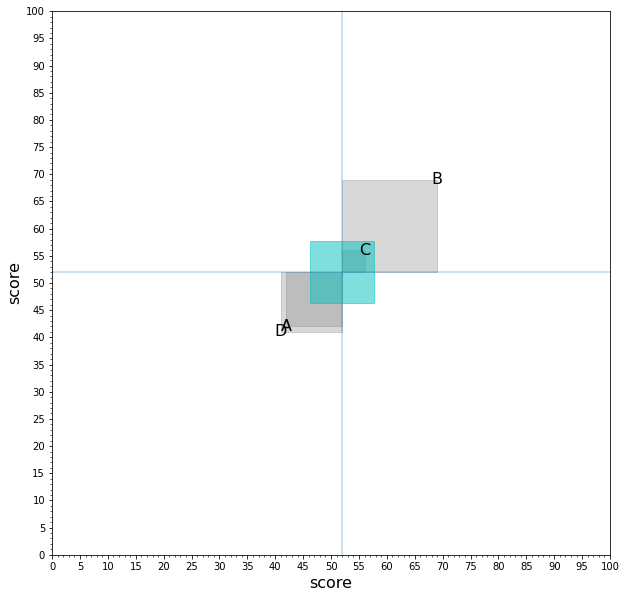

#### 
### 표준편차 : 분산의 제곱근
### ```np.std(data, ddof)```

In [41]:
np.sqrt(np.var(scores, ddof = 0))

9.274

In [42]:
np.std(scores, ddof = 0)

9.274

#### 
- 가장 진한 색의 영역 : 평균 $\pm$ 표준편차 구간
- 그 다음으로 진한 영역 : 평균 $\pm$ 2 표준편차
- 가장 옅은 영역 : 평균 $\pm$ 3 표준편차

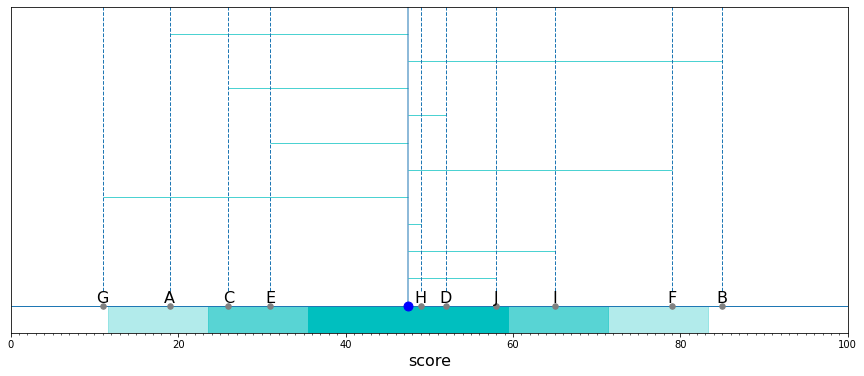

### 
### 범위 : 데이터의 최댓값과 최솟값만으로 산포도를 표현
### $R_g = x_{max} - x_{min}$

In [43]:
np.max(scores) - np.min(scores)

28

### 4분위수 범위
- 데이터의 하위 25%, 50%, 75%에 위치하는 값 = 제 1사분위수, 제 2사분위수, 제 3사분위수 (Q1, Q2, Q3)

### $IQR = Q3 - Q1$

### ```np.percentile(data, q)``` : 데이터의 하위 q%에 위치하는 값

In [28]:
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.0

### 
### 데이터의 지표 정리

### ```.describe()```

In [44]:
pd.Series(scores).describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

### 
## 데이터의 정규화
- 지표는 평균이나 분산에 따라 평가가 달라짐
- **평균이나 분산에 의존하지 않고도 데이터의 상대적 위치 관게를 알 수있는 지표 필요**

### 표준화 : 데이터에서 평균을 빼고 표준편차로 나눔
- 표준화된 데이터 : 표준화 변량 / Z 점수 (Z-score)
### $z_i = {{x_i - \bar{x}} \over s}$

In [45]:
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

- **표준화된 데이터의 평균은 0, 표준편차는 1**

In [46]:
np.mean(z), np.std(z, ddof = 0)

(-0.000, 1.000)

### 
### 편차값 : 평균이 50, 표준편차가 10이 되도록 정규화
### $z_i = 50 + 10  \times {{x_i - \bar{x}} \over s} $

In [47]:
z = 50 + 10 * (scores - np.mean(scores)) / np.std(scores)
z

array([35.982, 65.097, 51.078, 34.903, 52.157, 42.452, 60.783, 43.53 ,
       60.783, 53.235])

In [48]:
scores_df['deviation value'] = z
scores_df

,score,deviation value
student,,
A,42,35.981739
B,69,65.096588
C,56,51.078328
D,41,34.903412
E,57,52.156655
F,48,42.451706
G,65,60.783277
H,49,43.530034
I,65,60.783277


### 
## 데이터의 시각화

In [52]:
english_scores = np.array(df['english'])
english_scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58, 70, 47, 51, 64, 62, 70, 71,
       68, 73, 37, 65, 65, 61, 52, 57, 57, 75, 61, 47, 54, 66, 54, 54, 42,
       37, 79, 56, 62, 62, 55, 63, 57, 57, 67, 55, 45, 66, 55, 64, 66],
      dtype=int64)

In [53]:
pd.Series(english_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

### 
### 도수분포표 : 데이터를 몇 개의 구간으로 나누고, 각 구간에 몇 개의 데이터가 들어가는가를 계산
- **계급**: 구간 
- **도수** : 각 계급에 속한 데이터 수 


### ```np.histogram(data, bins, range)```

- 0부터 100까지를 10개의 계급으로 분리

In [58]:
freq, _ = np.histogram(english_scores, bins = 10, range = (0, 100))
freq # 도수

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [61]:
freq_class = [f'{i} ~ {i+10}' for i in range(0, 100, 10)]
freq_class

['0 ~ 10',
 '10 ~ 20',
 '20 ~ 30',
 '30 ~ 40',
 '40 ~ 50',
 '50 ~ 60',
 '60 ~ 70',
 '70 ~ 80',
 '80 ~ 90',
 '90 ~ 100']

In [60]:
freq_dist_df = pd.DataFrame({'frequency' : freq},
                            index = pd.Index(freq_class,
                                             name = 'class'))
freq_dist_df

,frequency
class,
0 ~ 10,0
10 ~ 20,0
20 ~ 30,0
30 ~ 40,2
40 ~ 50,8
50 ~ 60,16
60 ~ 70,18
70 ~ 80,6
80 ~ 90,0


### 
#### 게급값 : 각 계급을 대표하는 값 (계급별 중앙값)

In [62]:
class_value = [(i + (i + 10)) // 2 for i in range(0, 100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

### 
#### 상대도수 : 전체 데이터에 대해서 해당 계급의 데이터가 어느 정도의 비율을 차지하고 있는지를 나타냄

In [63]:
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

#### 
#### 누적상대도수 : 해당 계급까지의 상대도수의 합
### ```np.cumsum()``` : 누적합 계산

In [64]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

### 
- 계급값, 상대도수, 누적상대도수를 도수분포표에 추가

In [65]:
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class value', 'frequency',
                             'relative frequency', 'cumulative relative frequency']]

freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0 ~ 10,5,0,0.00,0.00
10 ~ 20,15,0,0.00,0.00
20 ~ 30,25,0,0.00,0.00
30 ~ 40,35,2,0.04,0.04
40 ~ 50,45,8,0.16,0.20
50 ~ 60,55,16,0.32,0.52
60 ~ 70,65,18,0.36,0.88
70 ~ 80,75,6,0.12,1.00
80 ~ 90,85,0,0.00,1.00


#### 최빈값 재검토

In [66]:
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class value']

65

### 
### 히스토그램
### ```ax.hist(data, bins, range, weights)``` : 히스토그램 생성
- ```weights``` : 상대도수 히스토그램 작성시, 가중치를 적용


### ```np.linspace(start, stop, num)``` : start 부터 stop 까지 num개의 구간점을 생성 (균등 구간)

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

1. 캔버스를 생성, figsize로 가로・세로 크기를 지정
2. 켄버스 위에 그래프를 그리기 위한 영역을 지정
3. 인수는 영역을 1×1개 지정、하나의 영역에 그린다는 것을 의미
4. 계급수를 10으로 하여 히스토그램을 그림
5. X축과 Y축에 레이블 부여
6. X축과 Y축의 눈금 구분
7. 그래프 표시

#### 계급폭이 10인 히스토그램

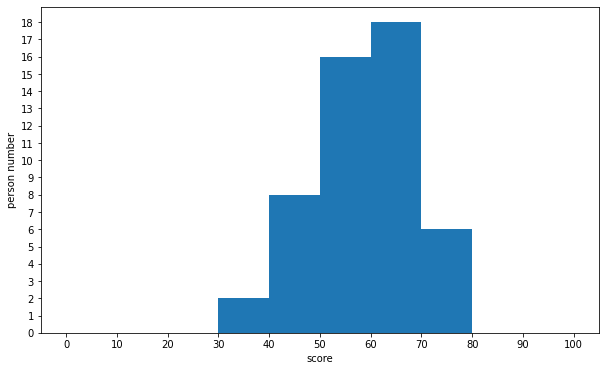

In [72]:
fig = plt.figure(figsize = (10, 6))

ax = fig.add_subplot(111)

freq, _, _ = ax.hist(english_scores, bins = 10, range = (0, 100))

ax.set_xlabel('score')
ax.set_ylabel('person number')

ax.set_xticks(np.linspace(0, 100, 10 + 1))
ax.set_yticks(np.arange(0, freq.max() + 1))

plt.show()

#### 계급폭이 4인 히스토그램

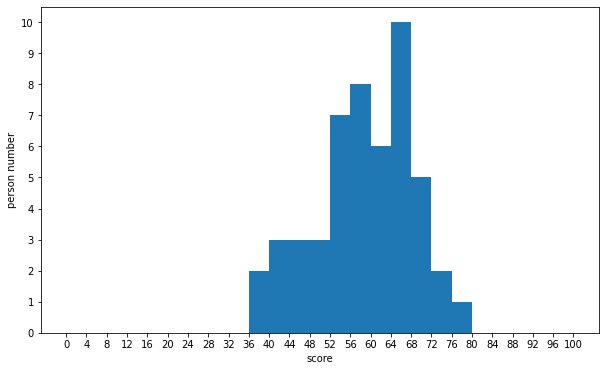

In [78]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

freq, _ , _ = ax.hist(english_scores, bins = 25, range=(0, 100))
ax.set_xlabel('score')
ax.set_ylabel('person number')

ax.set_xticks(np.linspace(0, 100, 25 + 1))
ax.set_yticks(np.arange(0, freq.max() + 1))

plt.show()

#### 상대도수의 히스토그램 + 누적상대도수 꺾은선 그래프

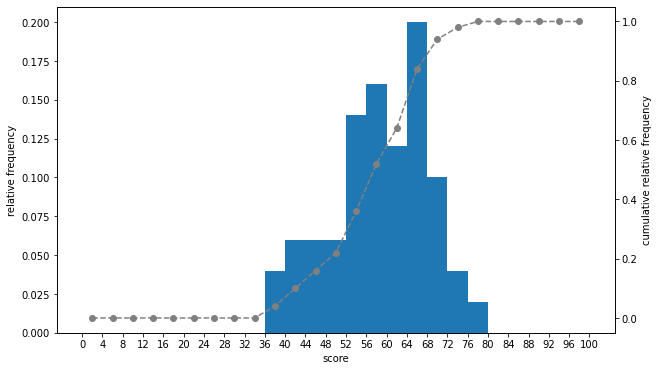

In [79]:
fig = plt.figure(figsize = (10, 6))
ax1 = fig.add_subplot(111)

ax2 = ax1.twinx() # Y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성

weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins = 25,
                          range = (0, 100), weights = weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i + (i + 4)) // 2 for i in range(0, 100, 4)]

# 꺾은선 그래프를 생성
ax2.plot(class_value, cum_rel_freq,
         ls = '--', marker = 'o', color = 'gray')

ax2.grid(visible = False) # 꺾은선 그래프의 눈금선을 제거

ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumulative relative frequency')

ax1.set_xticks(np.linspace(0, 100, 25 + 1))

plt.show()

### 상자 그림
### ```ax.boxplot()```

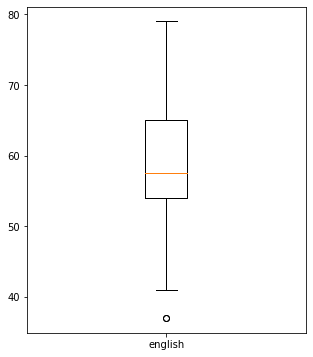

In [46]:
fig = plt.figure(figsize = (5, 6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels = ['english'])

plt.show()